<a href="https://colab.research.google.com/github/leah0727/class_ai4dl/blob/main/Automated_Essay_Scoring_Ordinal_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'learning-agency-lab-automated-essay-scoring-2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F71485%2F8059942%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240518%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240518T060143Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D727349852444b621c51fd606c83df2146da7be91de954a743cbcf75a30b677a93d59787648ee4b93cdff0e8647bb1c27d709ac9847a3adf6d5ce6bd06b5bd771dda338c0379b91f0d17d45bf05c86c4a7ffa9e6467b649a2b22f5de75f1ed997a3f7be6bfd90745097da044e78c1bf4edde814ce8586f00650760f20a9a545adf9e3fc8a13482b23cabe61410a46aa0265973969829950419f0be769088d7aa03c89f9c0b103cd3acf390c331aff5a27587d37359fb3016849ae4956f0451d0ffcfc9d9a1d8d65c507a71891f562184029eff51a6e80b60b7fab4b95e065b323d1222dcd9656a47f34a86c9fd259912adc0a443f899e62c443b61a8d712bee82'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 12464821 bytes downloaded
Downloaded and uncompressed: learning-agency-lab-automated-essay-scoring-2
Data source import complete.


# Automated Essay Score 2.0

The `AutoModelForSequenceClassification` is a class specifically designed for sequence classification tasks. Sequence classification tasks involve taking an input sequence (e.g., a sentence or paragraph) and classifying it into one or more categories or label. [1]

**Approach:**

Ordinal Regression

1. [2] Regression with Text Input Using BERT and Transformers
    - [4] Adapted to use **quadratic weighted kappa** metric instead of accuracy.
1. [3] Adding additional tokens for paragraphing (`'\n'`) and double spacing (`'  '`).
1. [3] No Dropout for Regression

    
**Model:**

1. `microsoft/deberta-v3-small` https://huggingface.co/docs/transformers/en/model_doc/deberta

**References**

- HuggingFace
    - [1] [AutoModelForSequenceClassification](https://www.c-sharpcorner.com/article/sequence-classification-using-hugging-face-transformers-library/)
    - [Text classification](https://huggingface.co/docs/transformers/en/tasks/sequence_classification)
<br><br>

- Ordinal Text Classification
    - [4] [NEW! Loss Function For Ordinal Text Classification](https://www.kaggle.com/competitions/learning-agency-lab-automated-essay-scoring-2/discussion/494873)
        - [Weighted kappa loss function for multi-class classification of ordinal data in deep learning](https://www.sciencedirect.com/science/article/abs/pii/S0167865517301666)
    - [2] [Regression with Text Input Using BERT and Transformers]()
        - [3. Fine-tuning with a Text Classification Model](https://lajavaness.medium.com/regression-with-text-input-using-bert-and-transformers-71c155034b13)
        - [4. Fine-tuning with a Regression Model](https://lajavaness.medium.com/regression-with-text-input-using-bert-and-transformers-71c155034b13)
<br><br>

- Kaggle
    - [3] [DeBERTa Starter Suggestions and Tips - LB 0.800+](https://www.kaggle.com/competitions/learning-agency-lab-automated-essay-scoring-2/discussion/497832)
        - [DeBERTa-v3-SMALL Starter - [CV 0.820 LB 0.800]](https://www.kaggle.com/code/cdeotte/deberta-v3-small-starter-cv-0-820-lb-0-800/notebook)
        - [The Magic of No Dropout](https://www.kaggle.com/competitions/commonlitreadabilityprize/discussion/260729)

In [2]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# Get Data

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch

os.environ["TOKENIZERS_PARALLELISM"] = 'true'

PATH_PREFIX = './kaggle'
if not os.path.exists(f'{PATH_PREFIX}/input'):
    PATH_PREFIX = '/kaggle'

FILES = {
    'train': [
        f'{PATH_PREFIX}/input/learning-agency-lab-automated-essay-scoring-2/train.csv',
    ],
    'test': [
        f'{PATH_PREFIX}/input/learning-agency-lab-automated-essay-scoring-2/test.csv',
    ],
}

class CFG:
    model_root = 'microsoft/deberta-v3-small' # 'distilbert/distilbert-base-uncased'
    max_length = 1024 # 512
    batch_size = 8
    model_name = f"{model_root.split('/')[1]}-finetuned-aes-{str(max_length)}"
    model_checkpoint = f'{PATH_PREFIX}/working/{model_name}'
    # Downloaded model files for local testing.
    model_kaggle = f'{PATH_PREFIX}/input/{model_name}/transformers/1/1'
    hub_checkout = f'marksusol/{model_name}'


class EssayDataFrame():
    def __init__(self, file='train', target='score'):
        self.file = file
        self.data = self.get_data(file)
        if target in self.data:
            self.data[target] = self.data[target].astype('int64')
            self.X, self.y = self.data.drop([target], axis=1), self.data[target]
        else:
            self.X, self.y = self.data, None

    def get_data(self, file):
        df = pd.read_csv(FILES[file][0])
        return df

    def get_split_datasets(self):
        """
        essay = EssayDataFrame(file='train')
        X, y = essay.X, essay.y
        X_train, X_validation, y_train, y_validation = essay.get_split_datasets()
        """
        return train_test_split(self.X, self.y, stratify=self.y, test_size=0.2, random_state=42)

essay = EssayDataFrame(file='train')
essay.data.groupby('score', group_keys=False).apply(lambda x: x.sample(3))

,essay_id,full_text,score
11178,a4c05da,My position on the driverless cars are dumb if...,1
5241,4e51f74,Despite the challenges of studying Venus. Scie...,1
7766,746e6d5,"In the story ""A Cowboy Who Rode the Waves"" Luk...",1
16614,f4f1df7,Driverless cars could be beneficial in many wa...,2
2121,201f6a9,I belive we should have driverless cars for ma...,2
4521,433d0c2,The land form found on mars was most surrley c...,2
16702,f61f4dc,World War ll was over and alot of damage was d...,3
2523,25da2fa,"For quite some time, there's been deep controv...",3
16162,ee76074,Limiting car usage will most definitly lead to...,3
5593,537ecf0,Do you wanna know how people feel about the dr...,4


In [4]:
print(essay.data['full_text'][1])

I am a scientist at NASA that is discussing the "face" on mars. I will be explaining how the "face" is a land form. By sharing my information about this isue i will tell you just that.

First off, how could it be a martions drawing. There is no plant life on mars as of rite now that we know of, which means so far as we know it is not possible for any type of life. That explains how it could not be made by martians. Also why and how would a martion build a face so big. It just does not make any since that a martian did this.

Next, why it is a landform. There are many landforms that are weird here in America, and there is also landforms all around the whole Earth. Many of them look like something we can relate to like a snake a turtle a human... So if there are landforms on earth dont you think landforms are on mars to? Of course! why not? It's just unique that the landform on Mars looks like a human face. Also if there was martians and they were trying to get our attention dont you thi

In [5]:
!pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [6]:
from datasets import concatenate_datasets, ClassLabel, Dataset, DatasetDict, Sequence

class BuildDatasets:

    def __init__(self, files, limit=False):
        self.files = files
        self.limit = limit
        self.datasets = self.load_data(files)

    def load_data(self, files) -> Dataset:
        dataset = {}
        for split in files.keys():
            datasets = []
            for file in files[split]:
                ds = self.get_dataset(file)
                datasets.append(ds)
            dataset[split] = concatenate_datasets(datasets)
        ds = DatasetDict({'train': dataset['train'], 'test': dataset['test']})

        # TODO: assert tokenized_ds['train'].features['label'].dtype == 'float64'
        # score_names = sorted(list(set(dataset['train']['label'])))
        #ds['train'] = ds['train'].cast_column('label', ClassLabel(num_classes=len(score_names), names=score_names))
        return ds

    def get_dataset(self, filename, target='score') -> Dataset:
        df = pd.read_csv(open(filename))
        if self.limit and target in df.columns:
            df_sample = df.groupby(target, group_keys=False).apply(lambda x: x.sample(100))
            data = Dataset.from_pandas(df_sample)
        else:
            data = Dataset.from_pandas(df)
        dataset = {
            'essay_id': [x['essay_id'] for x in data],
            'text': [x['full_text'] for x in data], # [1]
            # TODO: 'tokens': [x['tokens'] for x in data],
        }
        if target in data[0].keys():
            dataset[target] = [x[target] for x in data]
            dataset['label'] = [float(x[target] - 1) for x in data] # Apply float() here

        return Dataset.from_dict(dataset)

essay = BuildDatasets(FILES, limit=False)
essay.datasets

DatasetDict({
    train: Dataset({
        features: ['essay_id', 'text', 'score', 'label'],
        num_rows: 17307
    })
    test: Dataset({
        features: ['essay_id', 'text'],
        num_rows: 3
    })
})

In [7]:
essay.datasets['train'].features

{'essay_id': Value(dtype='string', id=None),
 'text': Value(dtype='string', id=None),
 'score': Value(dtype='int64', id=None),
 'label': Value(dtype='float64', id=None)}

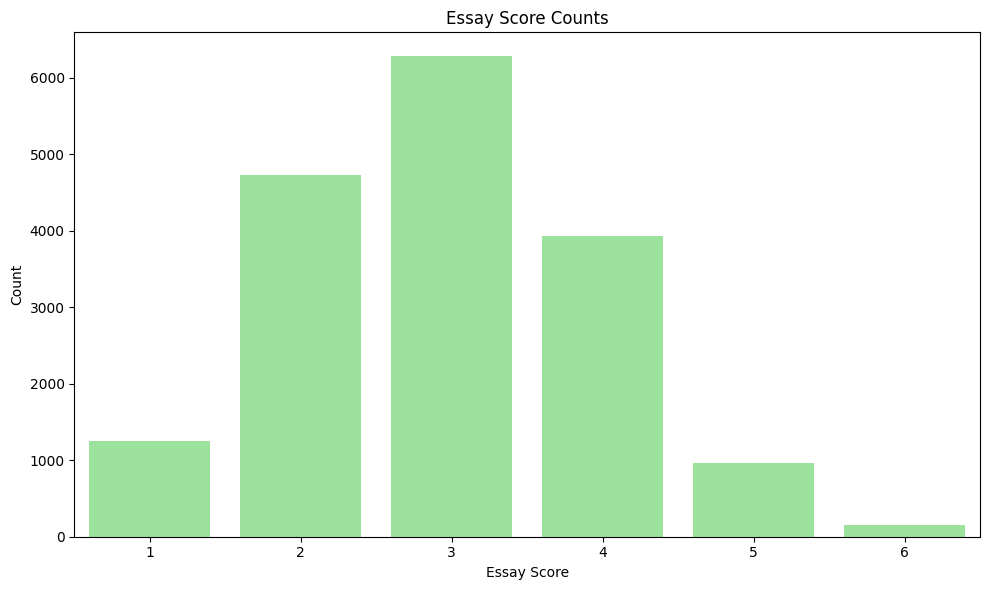

In [8]:
ds = essay.datasets['train']
df = ds.to_pandas()

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x=df['score'].to_list(), color='lightgreen', ax=ax)

ax.set_title('Essay Score Counts')
ax.set_xlabel('Essay Score')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

**^ imbalanced classification problem**

# TODO: Tokenization w/ token count distribution plot

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

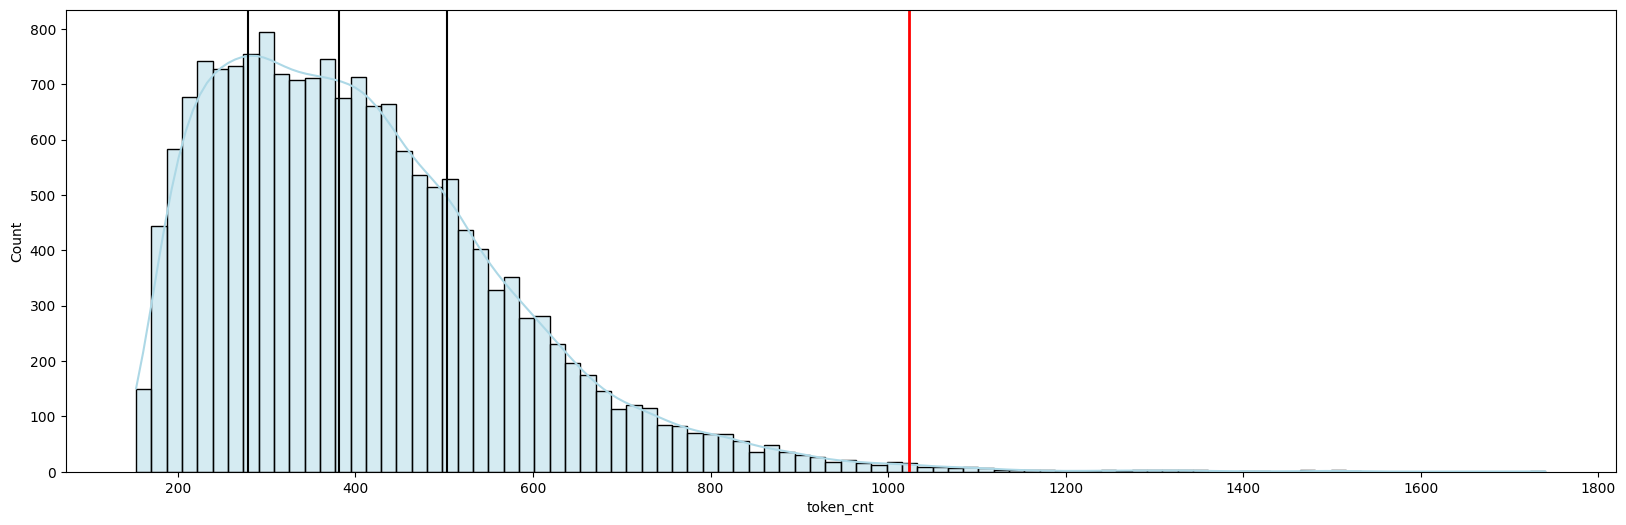

In [10]:
from nltk import word_tokenize

#df['token_cnt'] = df['tokens'].apply(lambda x: len(x))  # TODO: Need `tokens` in datasets
df['token_cnt'] = df['text'].apply(lambda x: len(word_tokenize(x)))
desc = df['token_cnt'].describe() # percentiles

fig, ax = plt.subplots(figsize=(20, 6))

sns.histplot(df['token_cnt'], ax=ax, kde=True, color='lightblue')
ax.axvline(x=CFG.max_length, color="red", lw=2)

percentiles = ['25%', '50%', '75%'] #, '90%', '95%']
for i in range(len(percentiles)):
    ax.axvline(desc[percentiles[i]], color='black')
plt.show()

# TODO: SpaCy

In [11]:
if False:
    import spacy

    nlp = spacy.load("en_core_web_sm")

    text = "My name is John Smith and I work at Acme Corp in New York City."

    # Process the text with Spacy
    doc = nlp(text)

    def get_bio_tokens(doc):
        for token in doc:
            entity = 'O'
            for ent in doc.ents:
                if token in ent:
                    for i, e in enumerate(ent):
                        if token.text == e.text:
                            entity = f"B-{e.ent_type_}" if i == 0 else f"I-{e.ent_type_}"
                            break
            print(f"Token: {token.text}, Entity: {entity or 'None'}")

    get_bio_tokens(doc)
    spacy.displacy.render(doc, style='ent', jupyter=True)

    text = essay.datasets['train']['text'][1]
    doc = nlp(text)

    #get_bio_tokens(doc)
    spacy.displacy.render(doc, style='ent', jupyter=True)

# Tokenization

In [12]:
import transformers
from transformers import AutoConfig, AutoTokenizer, AutoModelForSequenceClassification
from tokenizers import AddedToken


class RegressionDatasetTokenizer:

    def __init__(self, ds, checkpoint, max_length=CFG.max_length, is_train=True):
        self.max_length = max_length
        self.num_labels = 1  # Regression: 1 vs. Classification: 6
        self.dataset = ds
        self.checkpoint = checkpoint
        self.is_train = is_train
        self.set_tokenizer()
        self.tokenized_dataset = self.dataset.map(self.tokenize, batched=True)
        if self.is_train:
            self.tokenized_datasets = self.get_split_tokenized_dataset()

    def set_tokenizer(self):
        self.tokenizer = AutoTokenizer.from_pretrained(self.checkpoint)

        # ADD NEW TOKENS for ("\n") new paragraph and (" "*2) double space
        self.tokenizer.add_tokens([AddedToken('\n', normalized=False)])
        self.tokenizer.add_tokens([AddedToken(' '*2, normalized=False)])

        assert isinstance(self.tokenizer, transformers.PreTrainedTokenizerFast)
        assert self.tokenizer.is_fast == True

    def tokenize(self, data):
        return self.tokenizer(data['text'], max_length=self.max_length, padding='max_length', truncation=True)

    def get_split_tokenized_dataset(self) -> Dataset:
        # TODO: omission of stratify in `dataset.train_test_split`
        tokenized_datasets = self.tokenized_dataset.train_test_split(train_size=0.8, test_size=0.2, seed=42)
        tokenized_datasets['validation'] = tokenized_datasets['test']
        tokenized_datasets.pop('test')
        return tokenized_datasets

input = RegressionDatasetTokenizer(essay.datasets['train'], CFG.model_root, CFG.max_length)
tokenized_ds = input.tokenized_datasets

assert tokenized_ds['train'].features['label'].dtype == 'float64'
tokenized_ds

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

Map:   0%|          | 0/17307 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['essay_id', 'text', 'score', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 13845
    })
    validation: Dataset({
        features: ['essay_id', 'text', 'score', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3462
    })
})

In [13]:
tokenized_ds['train'].features

{'essay_id': Value(dtype='string', id=None),
 'text': Value(dtype='string', id=None),
 'score': Value(dtype='int64', id=None),
 'label': Value(dtype='float64', id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

In [14]:
tokenized_ds['train'].to_pandas()[['essay_id', 'text', 'score', 'label']].head()

,essay_id,text,score,label
0,ea26dc4,I belive that they should change the elections...,3,2.0
1,5987254,"Every theory needs to have proof, or else no o...",3,2.0
2,47ba414,Do you know that studying Venus is a worthy pu...,2,1.0
3,08d9638,Driverless cars sound like something that you ...,4,3.0
4,2a45bab,Introduction:This essay is going to be about c...,1,0.0


In [15]:
from sklearn.metrics import cohen_kappa_score
from transformers import DataCollatorWithPadding, EarlyStoppingCallback, Trainer, TrainingArguments

def set_device():
    if torch.cuda.is_available():
        device = torch.device('cuda')
        device_count = torch.cuda.device_count()
        for i in range(device_count):
            print(torch.cuda.get_device_name(i), end=' ')
        print(f'({device_count})')
        torch.cuda.manual_seed_all(42)
        torch.cuda.synchronize()
        print('Info: Device set to CUDA.')
    elif torch.backends.mps.is_available():
        # MPS (Apple's Metal Performance Shaders) on macOS
        device = torch.device('mps')
        torch.mps.synchronize()
        print('Info: Device set to MPS.')
    else:
        device = torch.device('cpu')
        print('Info: Device set to CPU.')
    return device


class RegressionTrainer(Trainer):
    """
    https://lajavaness.medium.com/regression-with-text-input-using-bert-and-transformers-71c155034b13
    """
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs[0][:, 0]
        loss = torch.nn.functional.mse_loss(logits, labels)
        return (loss, outputs) if return_outputs else loss


class RegressionModelTrainer:
    def __init__(self, model, tokenizer):
        self.device = set_device()
        self.model = (model).to(self.device)
        self.tokenizer = tokenizer
        self.data_collator = DataCollatorWithPadding(tokenizer)

    def compute_metrics_for_regression(self, eval_pred):
        logits, labels = eval_pred
        qwk = cohen_kappa_score(labels, logits.clip(0, 5).round(0), weights='quadratic')
        return {'qwk': qwk}

    def train(self, train_ds, **kwargs):
        self.training_args = TrainingArguments(
            output_dir=CFG.model_checkpoint,
            fp16=True if self.device == 'cuda' else False,
            learning_rate=2e-5,
            per_device_train_batch_size=CFG.batch_size,  # 8 per GPU
            per_device_eval_batch_size=CFG.batch_size,
            num_train_epochs=10, # TODO:
            report_to='none',  # 'wandb'
            evaluation_strategy='epoch',
            save_strategy='epoch',
            load_best_model_at_end=True,
            metric_for_best_model='qwk',
            lr_scheduler_type='linear', # "cosine" or "linear" or "constant"
            optim='adamw_torch',
            do_eval=True,
            save_total_limit=1,
            #warmup_ratio=0.1,
            weight_decay=0.01,
            push_to_hub=False,
        )

        self.model_trainer = RegressionTrainer(
            model=self.model,
            args=self.training_args,
            train_dataset=train_ds['train'],
            eval_dataset=train_ds['validation'],
            data_collator=self.data_collator,
            tokenizer=self.tokenizer,
            compute_metrics=self.compute_metrics_for_regression,
            callbacks=[
                EarlyStoppingCallback(early_stopping_patience=3,
                                      early_stopping_threshold=0.001)
            ],
        )

        self.model_trainer.train(**kwargs)
        self.model_trainer.save_model(CFG.model_checkpoint)
        self.tokenizer.save_pretrained(CFG.model_checkpoint)

In [16]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 6.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [17]:
!pip install transformers[torch]

In [18]:
TRAIN_ROOT = True
FREEZE = False

if TRAIN_ROOT:
    #!rm -R {CFG.model_name}
    assert input.num_labels == 1

    # No Dropout for Regression.
    config = AutoConfig.from_pretrained(CFG.model_root)
    config.attention_probs_dropout_prob = 0.0
    config.hidden_dropout_prob = 0.0
    config.num_labels = 1
    config.max_position_embeddings = CFG.max_length

    model = AutoModelForSequenceClassification.from_pretrained(CFG.model_root, config=config)
    # Added additional tokens.
    model.resize_token_embeddings(len(input.tokenizer))

    if FREEZE:
        for param in model.deberta.parameters():
            param.requires_grad = False

    trainer = RegressionModelTrainer(model, input.tokenizer)
    trainer.train(tokenized_ds)
else:
    assert os.path.isdir(CFG.model_checkpoint)

    model = AutoModelForSequenceClassification.from_pretrained(CFG.model_checkpoint)
    trainer = RegressionModelTrainer(model, input.tokenizer)
    trainer.train(tokenized_ds, resume_from_checkpoint=True)

pytorch_model.bin:   0%|          | 0.00/286M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Info: Device set to CPU.


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.21.0`: Please run `pip install transformers[torch]` or `pip install accelerate -U`

To download the model locally, use the following CLI command:

```zsh
(venv-tf16) kaggle % kaggle kernels output gdataranger/automated-essay-scoring-ordinal-regression/output -p kaggle/working
```



---



In [22]:
class ClassificationDatasetTokenizer:

    def __init__(self, ds, checkpoint, max_length=CFG.max_length, is_train=True):
        self.max_length = max_length
        self.num_labels = 6  # Classification: 클래스 수
        self.dataset = ds
        self.checkpoint = checkpoint
        self.is_train = is_train
        self.set_tokenizer()
        self.tokenized_dataset = self.dataset.map(self.tokenize, batched=True)
        if self.is_train:
            self.tokenized_datasets = self.get_split_tokenized_dataset()

    def set_tokenizer(self):
        self.tokenizer = AutoTokenizer.from_pretrained(self.checkpoint)
        self.tokenizer.add_tokens([AddedToken('\n', normalized=False)])
        self.tokenizer.add_tokens([AddedToken(' '*2, normalized=False)])
        assert isinstance(self.tokenizer, transformers.PreTrainedTokenizerFast)
        assert self.tokenizer.is_fast == True

    def tokenize(self, data):
        return self.tokenizer(data['text'], max_length=self.max_length, padding='max_length', truncation=True)

    def get_split_tokenized_dataset(self) -> Dataset:
        tokenized_datasets = self.tokenized_dataset.train_test_split(train_size=0.8, test_size=0.2, seed=42)
        tokenized_datasets['validation'] = tokenized_datasets['test']
        tokenized_datasets.pop('test')
        return tokenized_datasets

input = ClassificationDatasetTokenizer(essay.datasets['train'], CFG.model_root, CFG.max_length)
tokenized_ds = input.tokenized_datasets

# 특성(features)에서 'label' 열이 있는지 확인
assert 'label' in tokenized_ds['train'].features
# 'label' 열의 데이터 타입이 float64인지 확인
assert tokenized_ds['train'].features['label'].dtype == 'float64'

# 모델 및 훈련 코드는 분류 모델에 맞게 수정해야 합니다.


Map:   0%|          | 0/17307 [00:00<?, ? examples/s]

In [20]:
class ClassificationTrainer(Trainer):
    """
    https://lajavaness.medium.com/regression-with-text-input-using-bert-and-transformers-71c155034b13
    """
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        loss = torch.nn.functional.cross_entropy(outputs.logits, labels)
        return (loss, outputs) if return_outputs else loss

    def compute_metrics_for_classification(self, eval_pred):
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)
        accuracy = accuracy_score(labels, predictions)
        return {'accuracy': accuracy}

class ClassificationModelTrainer:
    def __init__(self, model, tokenizer):
        self.device = set_device()
        self.model = (model).to(self.device)
        self.tokenizer = tokenizer
        self.data_collator = DataCollatorWithPadding(tokenizer)

    def train(self, train_ds, **kwargs):
        self.training_args = TrainingArguments(
            output_dir=CFG.model_checkpoint,
            fp16=True if self.device == 'cuda' else False,
            learning_rate=2e-5,
            per_device_train_batch_size=CFG.batch_size,  # 8 per GPU
            per_device_eval_batch_size=CFG.batch_size,
            num_train_epochs=10, # TODO:
            report_to='none',  # 'wandb'
            evaluation_strategy='epoch',
            save_strategy='epoch',
            load_best_model_at_end=True,
            metric_for_best_model='accuracy',  # 변경된 메트릭
            lr_scheduler_type='linear', # "cosine" or "linear" or "constant"
            optim='adamw_torch',
            do_eval=True,
            save_total_limit=1,
            #warmup_ratio=0.1,
            weight_decay=0.01,
            push_to_hub=False,
        )

        self.model_trainer = ClassificationTrainer(
            model=self.model,
            args=self.training_args,
            train_dataset=train_ds['train'],
            eval_dataset=train_ds['validation'],
            data_collator=self.data_collator,
            tokenizer=self.tokenizer,
            compute_metrics=self.compute_metrics_for_classification,  # 변경된 메트릭
            callbacks=[
                EarlyStoppingCallback(early_stopping_patience=3,
                                      early_stopping_threshold=0.001)
            ],
        )

        self.model_trainer.train(**kwargs)
        self.model_trainer.save_model(CFG.model_checkpoint)
        self.tokenizer.save_pretrained(CFG.model_checkpoint)


In [21]:
if TRAIN_ROOT:
    #!rm -R {CFG.model_name}
    assert input.num_labels == 6  # 분류 작업의 클래스 수로 변경

    config = AutoConfig.from_pretrained(CFG.model_root)
    config.attention_probs_dropout_prob = 0.0
    config.hidden_dropout_prob = 0.0
    config.num_labels = 6  # 분류 작업의 클래스 수로 변경
    config.max_position_embeddings = CFG.max_length

    model = AutoModelForSequenceClassification.from_pretrained(CFG.model_root, config=config)
    model.resize_token_embeddings(len(input.tokenizer))

    if FREEZE:
        for param in model.deberta.parameters():
            param.requires_grad = False

    trainer = ClassificationModelTrainer(model, input.tokenizer)  # 분류 모델을 위한 트레이너 사용
    trainer.train(tokenized_ds)  # 분류 문제에 맞게 훈련

else:
    assert os.path.isdir(CFG.model_checkpoint)

    model = AutoModelForSequenceClassification.from_pretrained(CFG.model_checkpoint)
    trainer = ClassificationModelTrainer(model, input.tokenizer)  # 분류 모델을 위한 트레이너 사용
    trainer.train(tokenized_ds, resume_from_checkpoint=True)  # 분류 문제에 맞게 훈련 재개


Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Info: Device set to CPU.


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.21.0`: Please run `pip install transformers[torch]` or `pip install accelerate -U`

# Submission

**Note:** This is not for competition purposes, only to ensure correct logic.

In [ ]:
class ScorePredict:
    """
    Usage:
        essay = BuildDatasets(FILES)
        test_ds = essay.datasets['test']

        infer = RegressionDatasetTokenizer(test_ds, CFG.model_kaggle, is_train=False)
        tokenized_test_ds = infer.tokenized_dataset

        submission = ScorePredict(tokenized_test_ds, CFG.model_kaggle)
        df = submission.get_submission_df()
        df.to_csv('submission.csv', index=False)
    """
    def __init__(self, tokenized_ds, model_kaggle):
        self.tokenized_ds = tokenized_ds
        self.device = set_device()
        self.model = (AutoModelForSequenceClassification.from_pretrained(model_kaggle)).to(self.device)
        self.tokenizer = AutoTokenizer.from_pretrained(model_kaggle)
        self.args = TrainingArguments('.', per_device_eval_batch_size=1, report_to='none')
        self.trainer = RegressionTrainer(model=self.model, args=self.args, tokenizer=self.tokenizer)

    def get_submission_df(self):
        preds = self.trainer.predict(self.tokenized_ds).predictions
        df = self.tokenized_ds.to_pandas()[['essay_id']]
        df['score'] = preds.clip(0,5).round(0) + 1.0
        df['score'] = df['score'].astype(int)
        return df

In [ ]:
essay = BuildDatasets(FILES)
test_ds = essay.datasets['test']

infer = RegressionDatasetTokenizer(test_ds, CFG.model_checkpoint, is_train=False) # CFG.model_kaggle
tokenized_test_ds = infer.tokenized_dataset

submission = ScorePredict(tokenized_test_ds, CFG.model_checkpoint) # CFG.model_kaggle
df = submission.get_submission_df()
outfile = 'submission.csv'
df.to_csv(outfile, index=False)

In [ ]:
!cat {outfile} | head